# CSCI 580 Final Project
## Handwritten Digit Recognition using MLP
**Team Members:** Aaron Partridge


This project trains a simple Multilayer Perceptron (MLP) to classify handwritten digits using the MNIST dataset, and evaluates its performance on custom handwritten digits collected by our team.


# 1. Import Required Libraries
We import PyTorch, torchvision, and other necessary libraries for data loading, model building, and training.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt




# 2. Define Image Transform
We define the transformations to normalize image data from [0, 255] pixel values to [-1.0, 1.0].


In [2]:
# Define the transform first
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 3. Load MNIST Dataset
Download the MNIST dataset with transformations applied during loading.


In [3]:
# Download MNIST dataset with transform applied
trainset = datasets.MNIST(root='./MNIST_data', download=True, train=True, transform=transform)
testset = datasets.MNIST(root='./MNIST_data', download=True, train=False, transform=transform)

print("MNIST datasets downloaded!")

MNIST datasets downloaded!


# 4. Load Group Handwritten Digits
Load the handwritten digits collected by our team members into memory.


In [4]:
# Load our group handwritten digits
def ProjectDataLoader(path='./digits'):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.png'):
            label = int(filename.split('-')[0])
            img = Image.open(os.path.join(path, filename)).convert('L')  # grayscale
            img = np.array(img)
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = ProjectDataLoader()
print(images.shape)
print(labels.shape)



(330, 28, 28)
(330,)


# 5. Display a Sample Handwritten Digit
(Optional) Visualize one of the handwritten digit images to verify correct loading.


torch.Size([1, 28, 28])


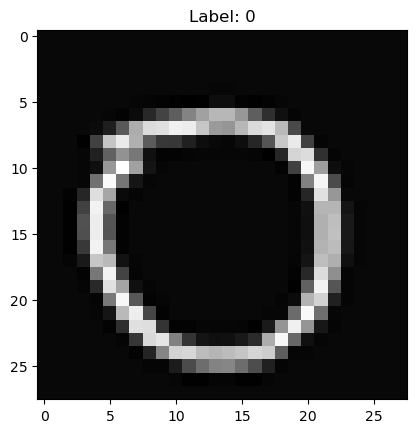

In [5]:
# Test: show one sample
sample_img = images[0]
sample_img_tensor = transform(sample_img)

print(sample_img_tensor.shape)  # Should be [1, 28, 28]

plt.imshow(sample_img_tensor.squeeze(0), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()


# 6. Define the MLP Model
We define a simple 3-layer Multilayer Perceptron for classifying digit images.


In [6]:
# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
print(model)



MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


# 7. Define Loss Function and Optimizer
Set up Cross Entropy Loss and Adam optimizer for model training.


In [7]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 8. Train the Model
Train the MLP using the MNIST training set for a fixed number of epochs.


In [8]:
# Train the model
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Corrected Training Loop
epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for images_batch, labels_batch in trainloader:
        optimizer.zero_grad()
        outputs = model(images_batch)
        loss = criterion(outputs, labels_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Finished Training")



Epoch 1, Loss: 0.33759272978631166
Epoch 2, Loss: 0.14877128409845297
Epoch 3, Loss: 0.10861040835481273
Epoch 4, Loss: 0.0894225395085024
Epoch 5, Loss: 0.07464617934784909
Epoch 6, Loss: 0.06438211400631759
Epoch 7, Loss: 0.0564301806198719
Epoch 8, Loss: 0.0516386339443424
Epoch 9, Loss: 0.04564529160414435
Epoch 10, Loss: 0.04105471446166939
Epoch 11, Loss: 0.03743123086462262
Epoch 12, Loss: 0.03638833493024033
Epoch 13, Loss: 0.033971292576272294
Epoch 14, Loss: 0.028871398275794546
Epoch 15, Loss: 0.027702392989718445
Epoch 16, Loss: 0.029365235246730466
Epoch 17, Loss: 0.02668613352433391
Epoch 18, Loss: 0.02504911250259898
Epoch 19, Loss: 0.02304051708091068
Epoch 20, Loss: 0.021094783838430994
Finished Training


# 9. Test Accuracy on MNIST Dataset
Evaluate the trained model on the MNIST test set.


In [9]:
# Evaluate on MNIST Test set
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for images_batch, labels_batch in testloader:
        outputs = model(images_batch)  # <-- No transform needed!
        _, predicted = torch.max(outputs, 1)
        total += labels_batch.size(0)
        correct += (predicted == labels_batch).sum().item()

mnist_accuracy = 100 * correct / total
print(f"Test Accuracy on MNIST: {mnist_accuracy:.2f}%")


Test Accuracy on MNIST: 97.88%


# 10. Test Accuracy on Group Handwritten Digits
Evaluate the trained model on the handwritten digits collected by our team.


In [10]:
# Evaluate on your group's digits
correct = 0
total = images.shape[0]

for idx in range(total):
    img = images[idx]
    label = labels[idx]

    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

    if predicted.item() == label:
        correct += 1

group_accuracy = 100 * correct / total
print(f"Test Accuracy on Team Digits: {group_accuracy:.2f}%")


Test Accuracy on Team Digits: 33.94%


In [11]:
from IPython.display import Markdown, display

display(Markdown(f"""
# 11. Summary of Results

**MNIST Test Accuracy:** {mnist_accuracy:.2f}%  
**Group Digits Test Accuracy:** {group_accuracy:.2f}%

"""))





# 11. Summary of Results

**MNIST Test Accuracy:** 97.88%  
**Group Digits Test Accuracy:** 33.94%

